In [1]:
from math import pi

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['patch.linewidth'] = 2
%matplotlib inline

import numpy as np

from scipy.optimize import curve_fit

from read_dataset import *

In [2]:
sqrts = np.array([88.4761, 89.4669, 90.2202, 91.229,  91.9646, 92.9618, 93.7136])
cross_section = read_dataset('2_cross_sections.csv')
cross_section_err = read_dataset('2_cross_sections_error.csv')

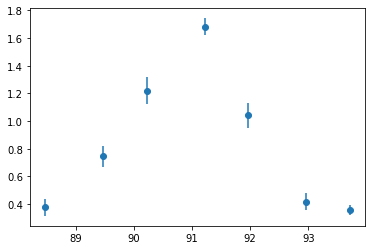

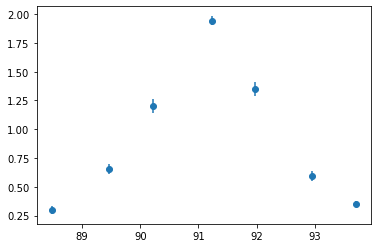

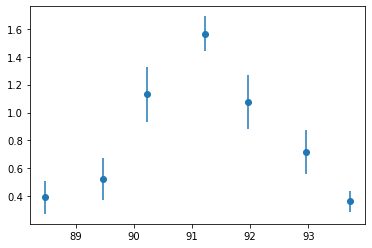

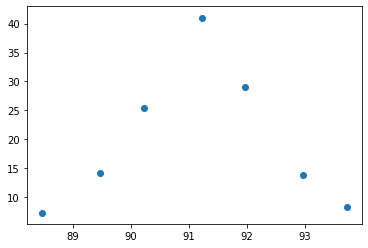

In [3]:
for i in range(4):
    plt.errorbar(sqrts, cross_section[:,i], cross_section_err[:,i], fmt='o')
    plt.show()
    plt.close()

In [4]:
# Breit-Wigner distribution parametrization
#BW = lambda sqrts, M, Gamma, sig0: sig0 * M**2 * Gamma**2 / ((sqrts**2 - M**2)**2 + M**2 * Gamma**2)
BW = lambda sqrts, M, Gamma, sig0: sig0/M**2 * sqrts**2 * Gamma**2 / ((sqrts**2-M**2)**2 + sqrts**4 * Gamma**2/M**2)
print(BW(80, 90, 2, 1))

1.0859955779617562e-06


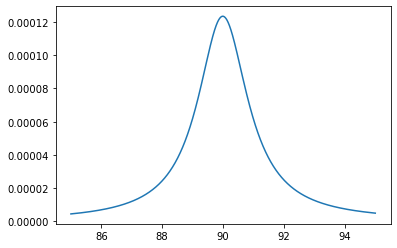

In [5]:
# plot it for some parameters
x = np.linspace(85,95,10000)
plt.plot(x, BW(x, 90, 2, 1))
plt.show()

In [6]:
# set options for numpy printing
np.set_printoptions(suppress=False)
np.set_printoptions(precision=6)

In [7]:
# do the fit
# TODO look up the documentation and understand what absolute_sigma=True does
# and discuss it with your supervisor (is this the right option? what happens in the default case?)
ind = {}
ind['ee'] = 0
ind['mm'] = 1
ind['tt'] = 2
ind['qq'] = 3

def fit_bw(channel):
    i = ind[channel]
    print('Fit for ', channel)
    fit, cov = curve_fit(BW,
                         sqrts, cross_section[:,i], sigma=cross_section_err[:,i],
                         p0 = (90, 2, 4000),
                         absolute_sigma=True)

    x = np.linspace(88,94,10000)
    plt.plot(x, BW(x, *fit));
    plt.errorbar(sqrts, cross_section[:,i], cross_section_err[:,i], fmt='o');
    plt.ylabel('$\sigma$ $[$nb$]$', fontsize=15)
    plt.xlabel('$\sqrt{s}$ $[$GeV$]$', fontsize=15)
    plt.savefig("plots/" + "bw_fit_" + channel + ".pdf",dpi=900, bbox_inches="tight")
    plt.show()
    plt.close()


    fit_err = np.sqrt(np.diag(cov))
    
    # residual plots
    residual = cross_section[:,i] - BW(sqrts, *fit)
    plt.plot(sqrts, residual, marker='o', linestyle='None')
    plt.ylabel('$\Delta\sigma$ $[$nb$]$', fontsize=15)
    plt.xlabel('$\sqrt{s}$ $[$GeV$]$', fontsize=15)
    plt.savefig("plots/" + "residual_" + channel + ".pdf",dpi=900, bbox_inches="tight")
    plt.show()
    plt.close()
    
    # pull plot
    pull = residual / cross_section_err[:,i]
    plt.plot(sqrts, pull, marker='o', linestyle='None')
    plt.ylabel('$(\Delta\sigma / \sigma_\sigma)$', fontsize=15)
    plt.xlabel('$\sqrt{s}$ $[$GeV$]$', fontsize=15)
    plt.savefig("plots/" + "pull_plot_" + channel + ".pdf",dpi=900, bbox_inches="tight")
    plt.show()
    plt.close()
    
    # chi_squared
    chi_squared = np.sum(pull**2)
    #print("Chi^2: ", chi_squared)
    #f = 4
    #print("Degrees of Freedom: ", f)
    #print("Chi^2/f: ", chi_squared/f)
    
    return fit, cov, fit_err, chi_squared

Fit for  ee


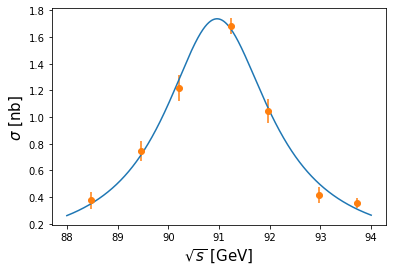

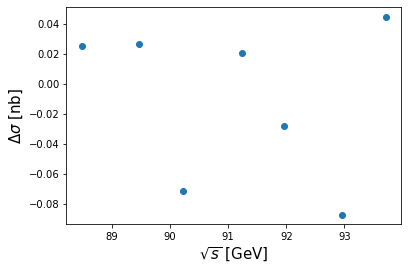

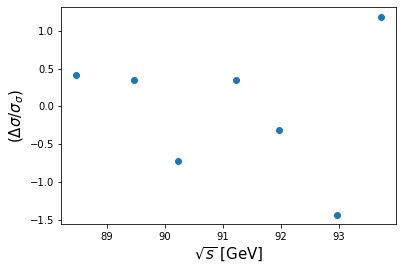

Fit for  mm


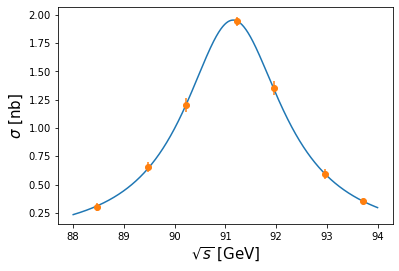

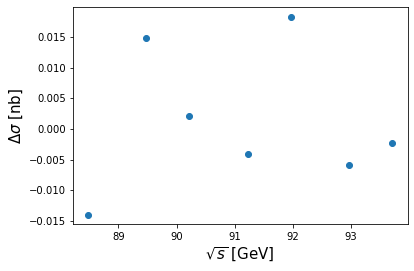

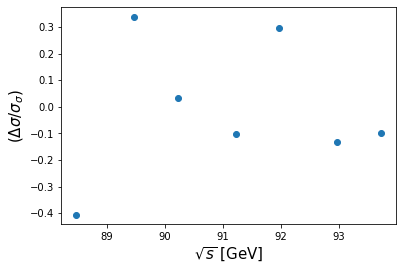

Fit for  tt


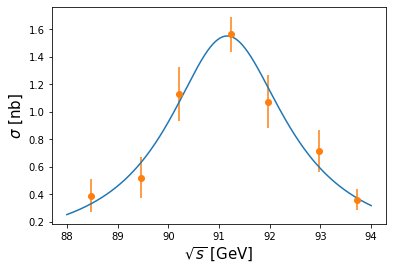

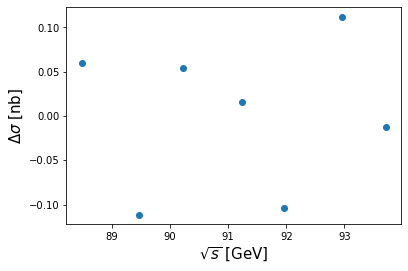

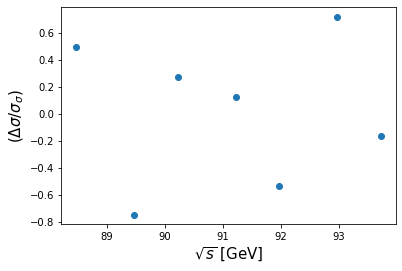

Fit for  qq


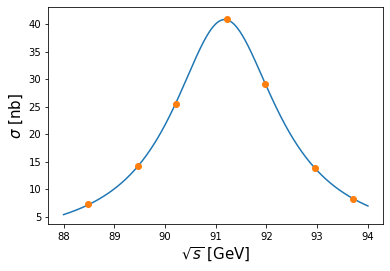

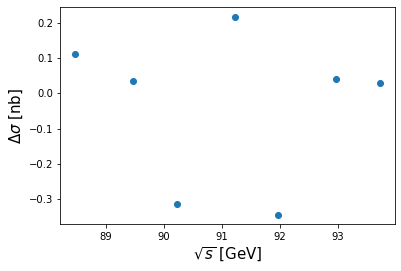

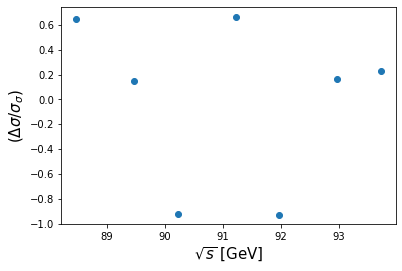

Values from fit: (M_Z, Gamma_Z, Sigma_0)
[[9.097907e+01 2.530898e+00 1.436414e+04]
 [9.116898e+01 2.371796e+00 1.623857e+04]
 [9.118366e+01 2.846138e+00 1.290262e+04]
 [9.119393e+01 2.520945e+00 3.393056e+05]]
Covariant matrices for the fits:
[[[ 3.118309e-03  1.308042e-03 -1.005186e+01]
  [ 1.308042e-03  1.783673e-02 -4.965128e+01]
  [-1.005186e+01 -4.965128e+01  3.061642e+05]]

 [[ 1.083279e-03  1.455957e-04 -1.640227e+00]
  [ 1.455957e-04  4.276731e-03 -1.249899e+01]
  [-1.640227e+00 -1.249899e+01  1.038354e+05]]

 [[ 1.921187e-02  6.535707e-04 -1.244330e+01]
  [ 6.535707e-04  9.411674e-02 -1.879441e+02]
  [-1.244330e+01 -1.879441e+02  9.716503e+05]]

 [[ 7.879390e-05  1.108120e-05 -1.688929e+00]
  [ 1.108120e-05  4.216079e-04 -3.698596e+01]
  [-1.688929e+00 -3.698596e+01  6.100493e+06]]]
Error for the fits (from Covariant matrix)
[[5.584183e-02 1.335542e-01 5.533210e+02]
 [3.291321e-02 6.539672e-02 3.222350e+02]
 [1.386069e-01 3.067845e-01 9.857232e+02]
 [8.876593e-03 2.053309e-02 

In [8]:
fits = np.zeros((4,3))
fits_err = np.zeros((4,3))
cov = np.zeros((4,3,3))
chi_squared = np.zeros((4,1))
for channel in ['ee', 'mm', 'tt', 'qq']:
    fits[ind[channel]], cov[ind[channel]], fits_err[ind[channel]], chi_squared[ind[channel]] = fit_bw(channel)
print('Values from fit: (M_Z, Gamma_Z, Sigma_0)')
print(fits)
print('Covariant matrices for the fits:')
print(cov)
print('Error for the fits (from Covariant matrix)')
print(fits_err)
print('Chi^2 for fits')
print(chi_squared)
print(chi_squared/4)

In [9]:
# Calculate sigma_peak for all channels
sigma_peak = np.zeros((4,1))
sigma_peak_err = np.zeros((4,1))
nb_to_gev = 1/0.389 * 10**(-6)
for channel in ['ee', 'mm', 'tt', 'qq']:
    M = fits[ind[channel],0]
    Gamma = fits[ind[channel],1]
    sigma_0 = fits[ind[channel],2]

    sigma_peak[ind[channel]] = sigma_0 / M**2
    
    M_err = fits_err[ind[channel],0]
    sigma_0_err = fits_err[ind[channel],2]
    cov_M_sigma_0 = cov[ind[channel],0,2]
    #sigma_peak_err[ind[channel]] = np.sqrt((sigma_0_err / M**2)**2 + (2 * sigma_0 * M_err / M**3)**2) #no correlation
    sigma_peak_err[ind[channel]] = np.sqrt((sigma_0_err / M**2)**2 + (2 * sigma_0 * M_err / M**3)**2 - (2 * sigma_0 / M**5) * cov_M_sigma_0) #with correlation

print('Sigma peak:')
print(sigma_peak)
print('Errors:')
print(sigma_peak_err)

Sigma peak:
[[ 1.735388]
 [ 1.95368 ]
 [ 1.551829]
 [40.799906]]
Errors:
[[0.067228]
 [0.038903]
 [0.118864]
 [0.297408]]


In [10]:
# Calculate partial widths
widths = np.zeros((4,1))
nb_to_gev = 1/0.389 * 10**(-6)

# electrons seperate
channel = 'ee'
M = fits[ind[channel],0]
Gamma = fits[ind[channel],1]

widths[0] = Gamma * M * np.sqrt(nb_to_gev * sigma_peak[0] / (12 * np.pi))

# other channels (dependent on gamma_e)
for channel in ['mm', 'tt', 'qq']:
    M = fits[ind[channel],0]
    Gamma = fits[ind[channel],1]
    sigma_0 = fits[ind[channel],2]
    widths[ind[channel]] = (Gamma**2 * nb_to_gev * sigma_peak[ind[channel]] * M**2) / (12 * np.pi * widths[0])
    
print('Partial widths:')
print(widths)

widths_err_uncorr = np.zeros((4,1))
widths_err_corr = np.zeros((4,1))
widths_err = np.zeros((4,1))

# electrons seperate
channel = 'ee'
M = fits[ind[channel],0]
Gamma = fits[ind[channel],1]
M_err = fits_err[ind[channel],0]
Gamma_err = fits_err[ind[channel],1]
cov_M_Gamma = cov[ind[channel],0,1]

#widths_err[0] = widths[0] * np.sqrt((Gamma_err/Gamma)**2 + (M_err/M)**2 + (sigma_peak_err[ind[channel]]/(2*sigma_peak[ind[channel]]))**2 + 2 * cov_M_Gamma / (Gamma * M))
# Calculate errorcoeffitions 
sqrt_sig_peak = np.sqrt( nb_to_gev * sigma_peak[ind[channel]] / ( 12 * np.pi ) )
widths_err[0] = np.sqrt( ( M * sqrt_sig_peak * Gamma_err )**2 + ( Gamma * sqrt_sig_peak * M_err )**2 + ( Gamma * M * 1 / np.sqrt( 12 * np.pi * nb_to_gev * sigma_peak[ind[channel]]) * nb_to_gev * sigma_peak_err[ind[channel]] )**2  
                         + 2 * M * Gamma *sqrt_sig_peak**2 * cov_M_Gamma )

for channel in ['mm', 'tt', 'qq']:
    M = fits[ind[channel],0]
    Gamma = fits[ind[channel],1]
    M_err = fits_err[ind[channel],0]
    Gamma_err = fits_err[ind[channel],1]
    cov_M_Gamma = cov[ind[channel],0,1]
    
    #widths_err[ind[channel]] = widths[ind[channel]] *  np.sqrt((2*Gamma_err/Gamma)**2 + (2*M_err/M)**2 + (sigma_peak_err[ind[channel]]/(2*sigma_peak[ind[channel]]))**2 
    #                                                           + (widths_err[0]/widths[0])**2 + 8 * Gamma * M * cov_M_Gamma / (Gamma * M))
    widths_err[ind[channel]] = np.sqrt( (2 * widths[ind[channel]] / Gamma * Gamma_err)**2 + (2 * widths[ind[channel]] / M * M_err)**2 + (widths[ind[channel]] /(nb_to_gev * sigma_peak[ind[channel]]) * nb_to_gev * sigma_peak_err[ind[channel]])**2 
                                       + (widths[ind[channel]] / widths[0] * widths_err[0])**2 + 4 * Gamma**3 * M**3 * nb_to_gev**2 * sigma_peak[ind[channel]]**2 / (144 * np.pi**2 * widths[0]**2) * cov_M_Gamma )

print('Errors:')
print(widths_err)


Partial widths:
[[0.079209]
 [0.078641]
 [0.089978]
 [1.856363]]
Errors:
[[0.005192]
 [0.006918]
 [0.021417]
 [0.126121]]


In [11]:
# weighted means
M_mean = 0
Gamma_mean = 0
for channel in ['ee', 'mm', 'tt', 'qq']:
    M_mean += fits[ind[channel],0] / fits_err[ind[channel],0]
    Gamma_mean += fits[ind[channel],1] / fits_err[ind[channel],1]

M_mean_normal = np.sum(1 / fits_err[:,0])
Gamma_mean_normal = np.sum(1 / fits_err[:,1])
M_mean_err = np.sqrt(np.sum(1 / fits_err[:,0]))
Gamma_mean_err = np.sqrt(np.sum(1 / fits_err[:,1]))
print('Weighted mean M: ',  M_mean / M_mean_normal)
print('Error M: ', 1/M_mean_err)
print('Weighted mean Gamma: ',  Gamma_mean / Gamma_mean_normal)
print('Error Gamma: ', 1/Gamma_mean_err)

Weighted mean M:  91.16609764610311
Error M:  0.0771146986495884
Weighted mean Gamma:  2.5056098216788985
Error Gamma:  0.11567044146247725


In [12]:
width_neutrino = 0.1676

Gamma = Gamma_mean / Gamma_mean_normal

# für Gamma: gewichteter Mittelwert
number_neutrino = 1/width_neutrino * (Gamma - widths[0] - widths[1] - widths[2] - widths[3])
print(number_neutrino)

[2.395102]
